In [1]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import Aer
from qiskit.visualization import *
from qiskit import transpile, QuantumCircuit

In [3]:
service = QiskitRuntimeService(
    channel='ibm_quantum',
    token='f3d069d213e4c5975019901af64a57620f48ec0b1e22ea61bc38edd04c3352eb3a9d80bf976ef573fa9937f3dbd7788f16313b17dbfbc3a28c09a0b619dcc265'
)

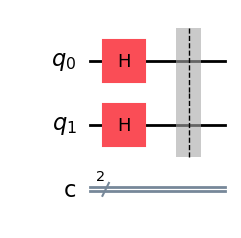

In [2]:
grover_circuit = QuantumCircuit(2, 2)

# 중첩 단계
for i in range(2):
    grover_circuit.h(i)
grover_circuit.barrier()

grover_circuit.draw('mpl')

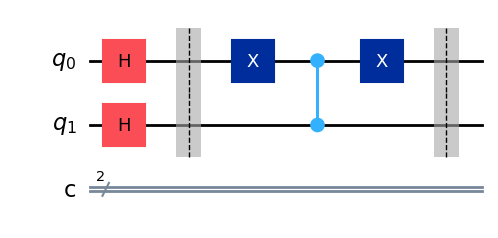

In [3]:
# 오라클 단계
def oracle_00(qc):
    qc.x([0, 1])
    qc.cz(0, 1)
    qc.x([0, 1])
    qc.barrier()

def oracle_01(qc):
    qc.x(0)
    qc.cz(0, 1)
    qc.x(0)
    qc.barrier()

def oracle_10(qc):
    qc.x(1)
    qc.cz(0, 1)
    qc.x(1)
    qc.barrier()

def oracle_11(qc):
    qc.cz(0, 1)
    qc.barrier()

oracle_01(grover_circuit)
grover_circuit.draw('mpl')


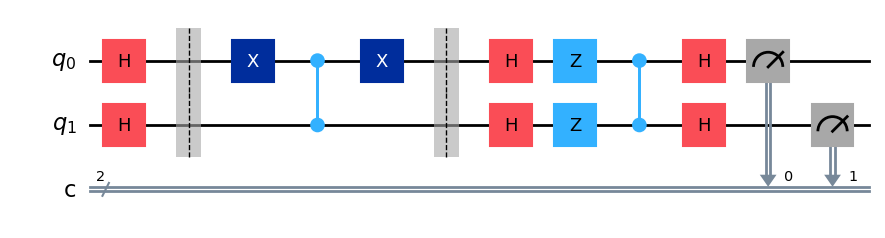

In [4]:
# 증폭 단계
def diffuser(qc):
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])
    qc.measure(range(2), range(2))

diffuser(grover_circuit)
grover_circuit.draw('mpl')

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(grover_circuit, backend), shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)
print(counts)

{'10': 1024}
